Student_name = "Sai Sreenath Tangirala"







Student_id = "46258043"

**`Importing different Libraries.`**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
gd = pd.read_csv('data/gun_deaths.csv')
gd.head()

,Year,Sex,Intent,Total,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
0,2018,Both sexes,Total - all intents,"39,740",7,91,437,"7,411","8,100","6,027","5,323","5,353","3,662","2,365",963,1
1,2018,Both sexes,Suicide,"24,432",0,0,203,"2,995","3,429","3,222","3,787","4,421","3,237","2,215",923,0
2,2018,Both sexes,Assault,"13,958",6,54,191,"4,107","4,348","2,569","1,382",802,347,114,37,1
3,2018,Both sexes,Legal intervention,539,0,0,0,87,160,148,67,55,18,4,0,0
4,2018,Both sexes,Preventable/accidental,458,0,30,24,129,79,46,45,51,34,19,1,0


In [3]:
gd.isna().sum()

Year                     0
Sex                      0
Intent                   0
Total                    0
less_than_1_year         0
1_to_4_years             0
5_to_14_years            0
15_to_24_years           0
25_to_34_years           0
35_to_44_years           0
45_to_54_years           0
55_to_64_years           0
65_to_74_years           0
75_to_84_years           0
greater_than_85_years    0
Not_Stated               0
dtype: int64

In [4]:
agd = gd.drop(0)
print(agd)

     Year         Sex                  Intent   Total less_than_1_year  \
1    2018  Both sexes                 Suicide  24,432                0   
2    2018  Both sexes                 Assault  13,958                6   
3    2018  Both sexes      Legal intervention     539                0   
4    2018  Both sexes  Preventable/accidental     458                0   
5    2018  Both sexes            Undetermined     353                1   
..    ...         ...                     ...     ...              ...   
355  1999        Male                 Suicide  14,479                -   
356  1999        Male                 Assault   8,944                5   
357  1999        Male  Preventable/accidental     707                0   
358  1999        Male      Legal intervention     293                0   
359  1999        Male            Undetermined     277                0   

    1_to_4_years  5_to_14_years 15_to_24_years 25_to_34_years 35_to_44_years  \
1              0            203

In [5]:
agd.head()

,Year,Sex,Intent,Total,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
1,2018,Both sexes,Suicide,"24,432",0,0,203,"2,995","3,429","3,222","3,787","4,421","3,237","2,215",923,0
2,2018,Both sexes,Assault,"13,958",6,54,191,"4,107","4,348","2,569","1,382",802,347,114,37,1
3,2018,Both sexes,Legal intervention,539,0,0,0,87,160,148,67,55,18,4,0,0
4,2018,Both sexes,Preventable/accidental,458,0,30,24,129,79,46,45,51,34,19,1,0
5,2018,Both sexes,Undetermined,353,1,7,19,93,84,42,42,24,26,13,2,0


In [6]:
ugd = agd.drop('Total', axis=1)
ugd.head()

,Year,Sex,Intent,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
1,2018,Both sexes,Suicide,0,0,203,"2,995","3,429","3,222","3,787","4,421","3,237","2,215",923,0
2,2018,Both sexes,Assault,6,54,191,"4,107","4,348","2,569","1,382",802,347,114,37,1
3,2018,Both sexes,Legal intervention,0,0,0,87,160,148,67,55,18,4,0,0
4,2018,Both sexes,Preventable/accidental,0,30,24,129,79,46,45,51,34,19,1,0
5,2018,Both sexes,Undetermined,1,7,19,93,84,42,42,24,26,13,2,0


In [7]:
ugd.head(10)

,Year,Sex,Intent,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
1,2018,Both sexes,Suicide,0,0,203,"2,995","3,429","3,222","3,787","4,421","3,237","2,215",923,0
2,2018,Both sexes,Assault,6,54,191,"4,107","4,348","2,569","1,382",802,347,114,37,1
3,2018,Both sexes,Legal intervention,0,0,0,87,160,148,67,55,18,4,0,0
4,2018,Both sexes,Preventable/accidental,0,30,24,129,79,46,45,51,34,19,1,0
5,2018,Both sexes,Undetermined,1,7,19,93,84,42,42,24,26,13,2,0
6,2018,Female,Total - all intents,2,29,129,887,"1,129",959,994,879,513,202,62,0
7,2018,Female,Suicide,0,0,44,345,499,519,684,682,374,141,43,0
8,2018,Female,Assault,2,24,78,513,596,422,291,182,133,57,19,0
9,2018,Female,Undetermined,0,1,2,16,21,9,11,5,3,1,0,0
10,2018,Female,Preventable/accidental,0,4,5,9,7,4,4,7,2,3,0,0


In [8]:
ugd.shape

(359, 15)

In [9]:
ugd.isna().sum()

Year                     0
Sex                      0
Intent                   0
less_than_1_year         0
1_to_4_years             0
5_to_14_years            0
15_to_24_years           0
25_to_34_years           0
35_to_44_years           0
45_to_54_years           0
55_to_64_years           0
65_to_74_years           0
75_to_84_years           0
greater_than_85_years    0
Not_Stated               0
dtype: int64

In [12]:
ugd["less_than_1_year"] = pd.to_numeric(ugd["less_than_1_year"], errors='coerce')
ugd["1_to_4_years"] = pd.to_numeric(ugd["1_to_4_years"], errors='coerce')
ugd["15_to_24_years"] = pd.to_numeric(ugd["15_to_24_years"], errors='coerce')
ugd["25_to_34_years"] = pd.to_numeric(ugd["25_to_34_years"], errors='coerce')
ugd["35_to_44_years"] = pd.to_numeric(ugd["35_to_44_years"], errors='coerce')
ugd["45_to_54_years"] = pd.to_numeric(ugd["45_to_54_years"], errors='coerce')
ugd["55_to_64_years"] = pd.to_numeric(ugd["55_to_64_years"], errors='coerce')
ugd["65_to_74_years"] = pd.to_numeric(ugd["65_to_74_years"], errors='coerce')
ugd["75_to_84_years"] = pd.to_numeric(ugd["75_to_84_years"], errors='coerce')
ugd["greater_than_85_years"] = pd.to_numeric(ugd["greater_than_85_years"], errors='coerce')
ugd.head(5)

,Year,Sex,Intent,less_than_1_year,1_to_4_years,5_to_14_years,15_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,65_to_74_years,75_to_84_years,greater_than_85_years,Not_Stated
1,2018,Both sexes,Suicide,0.0,0.0,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923.0,0
2,2018,Both sexes,Assault,6.0,54.0,191,NaN,NaN,NaN,NaN,802.0,347.0,114.0,37.0,1
3,2018,Both sexes,Legal intervention,0.0,0.0,0,87.0,160.0,148.0,67.0,55.0,18.0,4.0,0.0,0
4,2018,Both sexes,Preventable/accidental,0.0,30.0,24,129.0,79.0,46.0,45.0,51.0,34.0,19.0,1.0,0
5,2018,Both sexes,Undetermined,1.0,7.0,19,93.0,84.0,42.0,42.0,24.0,26.0,13.0,2.0,0


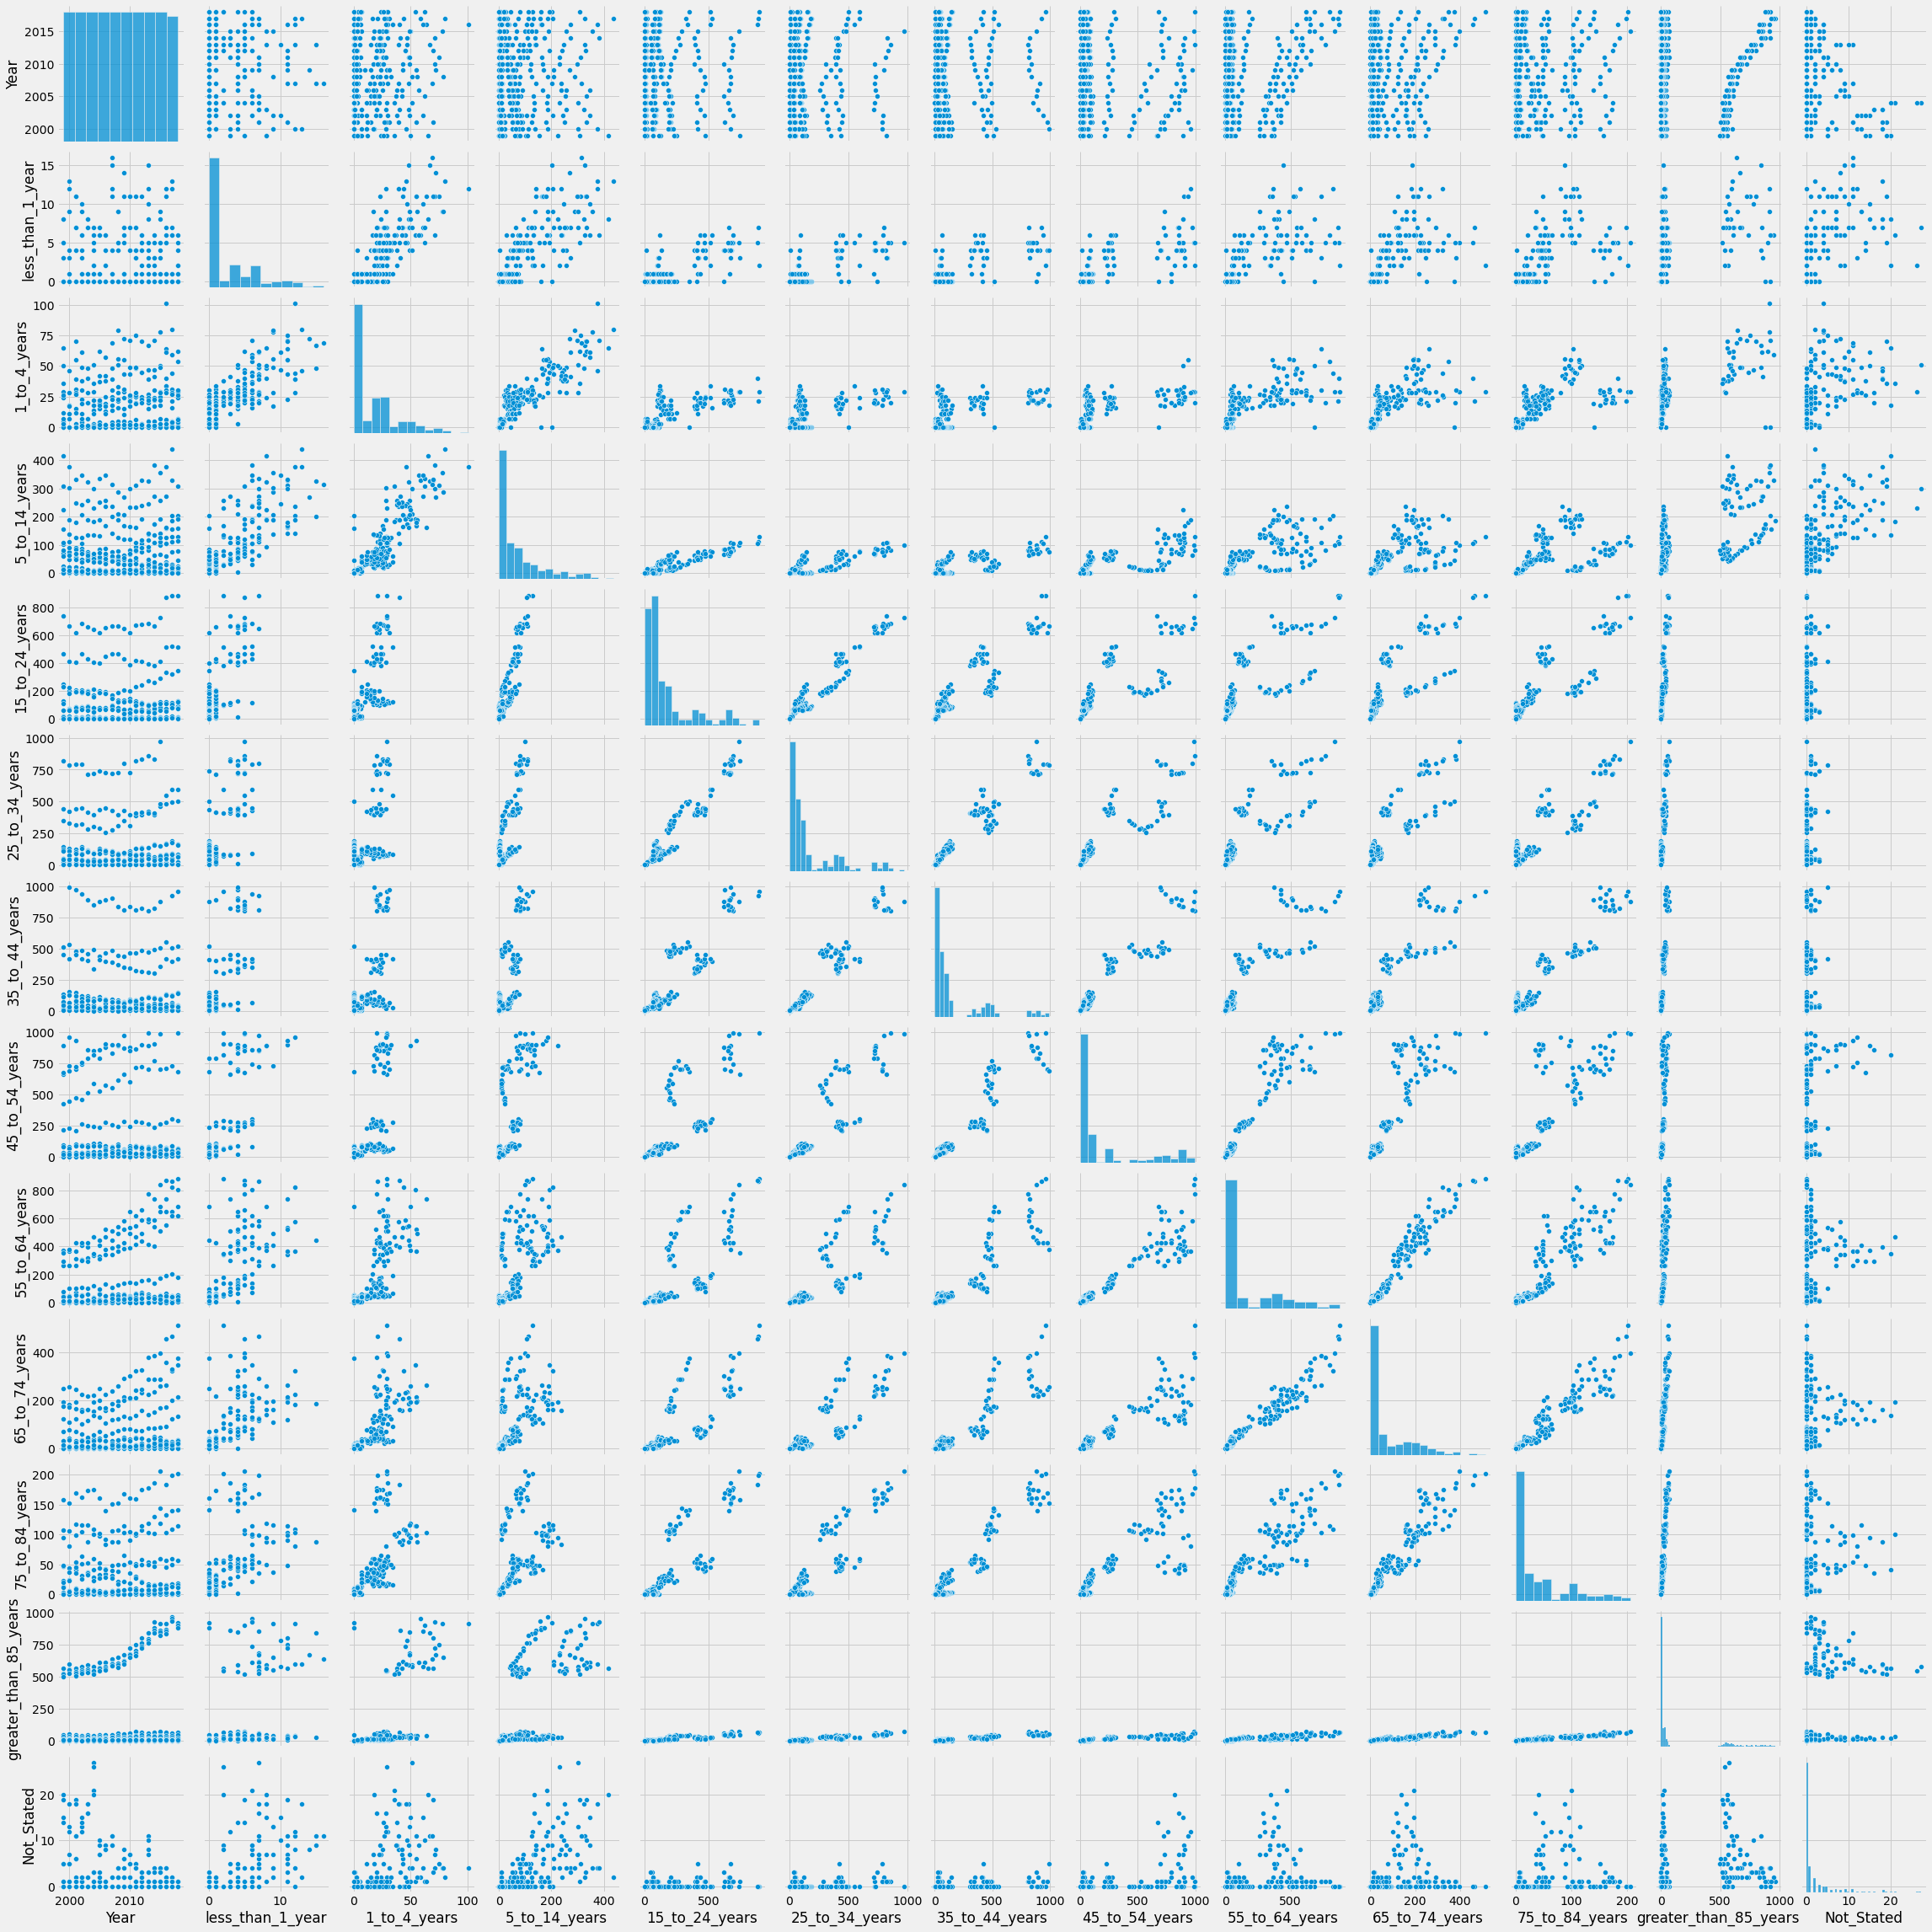

In [13]:
sns.pairplot(ugd)

**From the above pairplot we can observe that the most deaths occured are within the age groups of 5-14 and 75-84 and the least within the age group of greater than 85 years**

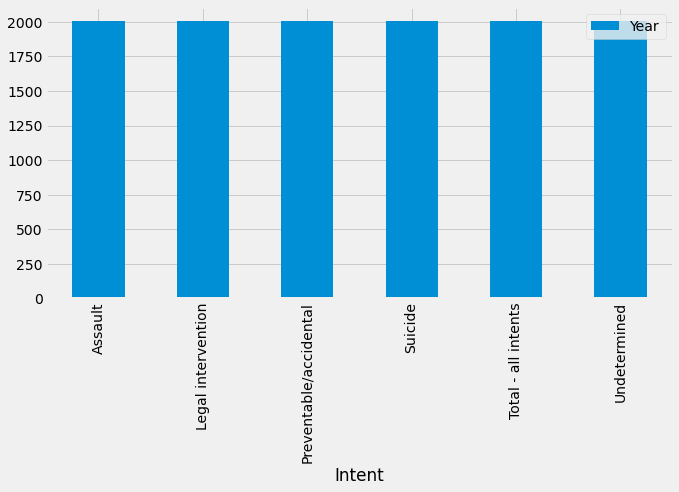

In [11]:
k=pd.pivot_table(values='Year',index='Intent',data=ugd,aggfunc='mean')
plt.style.use('fivethirtyeight')
k.plot(kind='bar',figsize=(10,5))
plt.show()

**The above graph describes the intentions of all deaths**